In [2]:
from glob import glob

import cv2
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Duplicate key in file PosixPath('/usr/local/Caskroom/miniconda/base/envs/mlenv/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : IPAexGothic')


In [3]:
def read_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def show_img(path):
    img = read_img(path)
    plt.imshow(img)
    plt.show()

def show_img_pair(path1, path2):
    
    plt.subplot(1, 2, 1)
    img = read_img(path1)
    plt.imshow(img)
    plt.title(f"出願: {path1.split('/')[-1]}", fontsize=12)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1, 2, 2)
    img = read_img(path2)
    plt.imshow(img)
    plt.title(f"引用: {path2.split('/')[-1]}", fontsize=12)
    plt.xticks([])
    plt.yticks([])

    plt.tight_layout()
    plt.show()

<b>train.csv</b>

出願画像と引用画像（出願画像に類似すると判断された画像）のペア

画像ID・パス・どの様な種類の類似と判定されたか が含まれる

どの様な種類の類似と判定されたか（2:酷似、3:部分一致、4:色彩相違、5:向きの相違）

In [4]:
train_df = pd.read_csv('../data/input/train.csv')
print(train_df.shape)
train_df.head()

(2311, 5)


gid                       path    cite_gid  \
0  1000289808  1000289808/1000289808.jpg  1000400231   
1  1000266291  1000266291/1000266291.jpg  1000206509   
2  1000485598  1000485598/1000485598.jpg  1000423794   
3  1000097009  1000097009/1000097009.jpg  1000627155   
4  1000337548  1000337548/1000337548.jpg  1000369541   

                   cite_path  category  
0  1000400231/1000400231.jpg         3  
1  1000206509/1000206509.jpg         3  
2  1000423794/1000423794.jpg         3  
3  1000627155/1000627155.jpg         2  
4  1000369541/1000369541.jpg         2

In [5]:
train_df['category'].value_counts()

3    1133
2     682
4     373
5     123
Name: category, dtype: int64

In [6]:
BASE_PATH = '/Users/mhiro/Projects/cpt-jpo/data/input/' # ご自身の環境のパスを指定ください
train_df['path'] = BASE_PATH+'apply_images/'+train_df['path']
train_df['cite_path'] = BASE_PATH+'cite_images/'+train_df['cite_path']

2:酷似

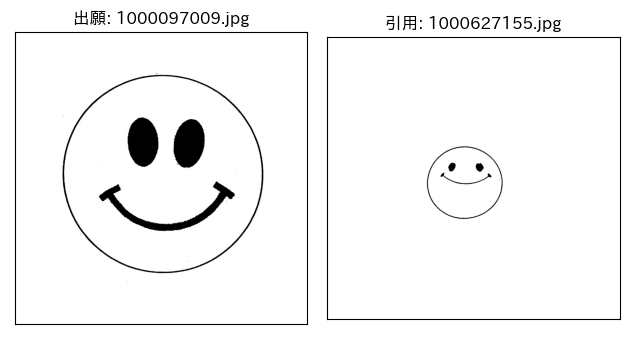

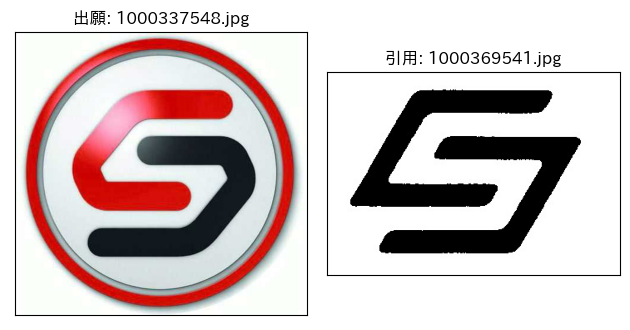

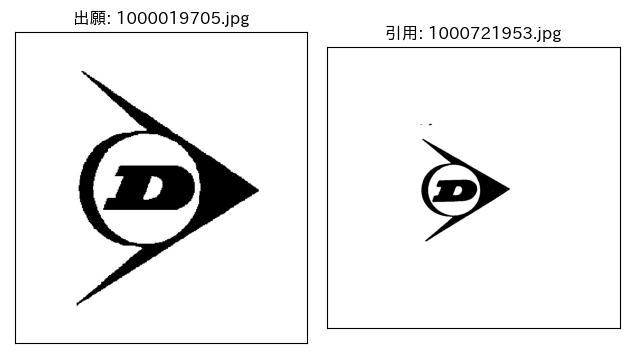

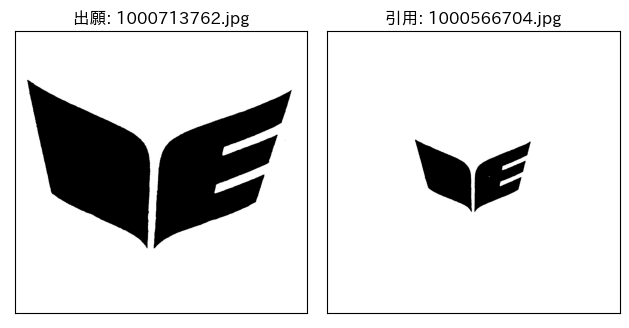

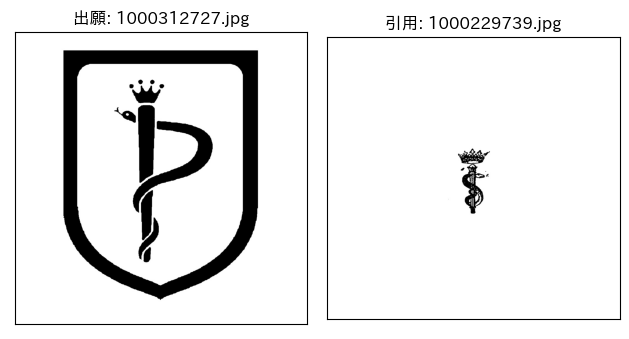

In [7]:
for i in range(5):
    idx = train_df[train_df['category'] == 2].index[i]
    show_img_pair(train_df.iloc[idx,1], train_df.iloc[idx,3])

3:部分一致

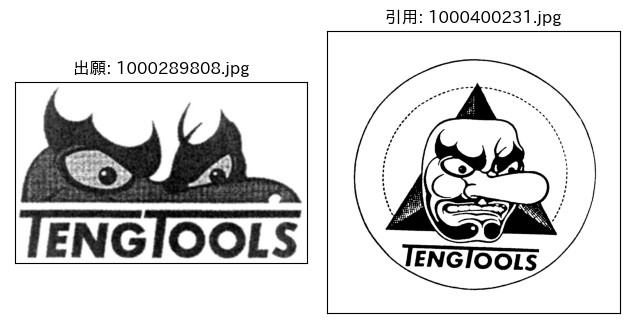

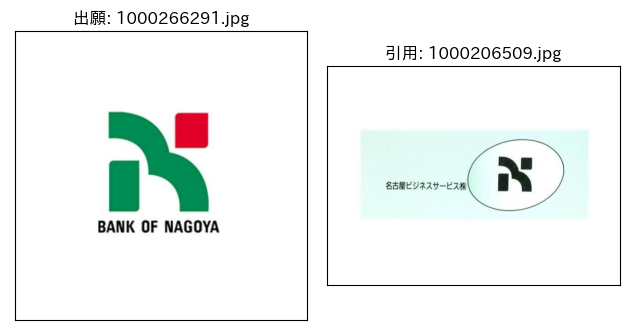

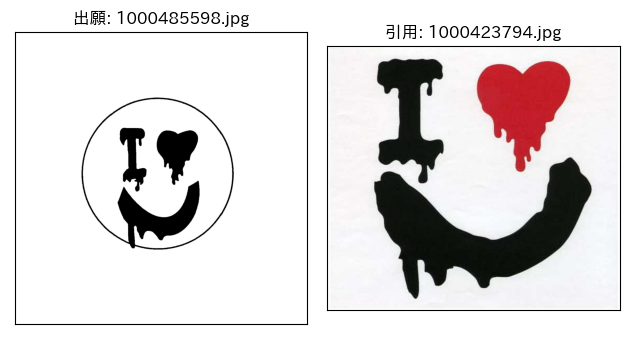

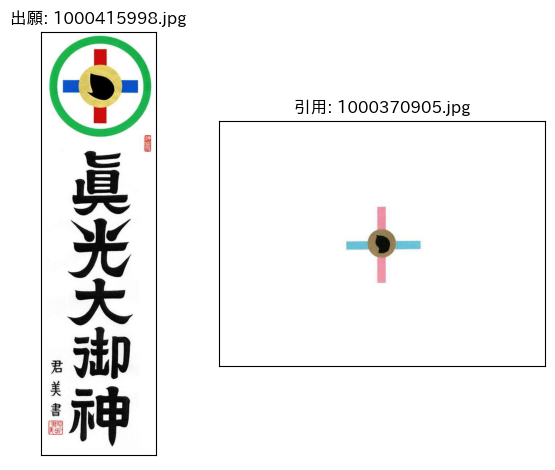

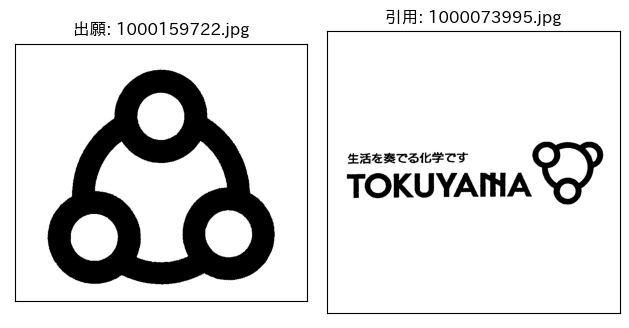

In [8]:
for i in range(5):
    idx = train_df[train_df['category'] == 3].index[i]
    show_img_pair(train_df.iloc[idx,1], train_df.iloc[idx,3])

4:色彩相違

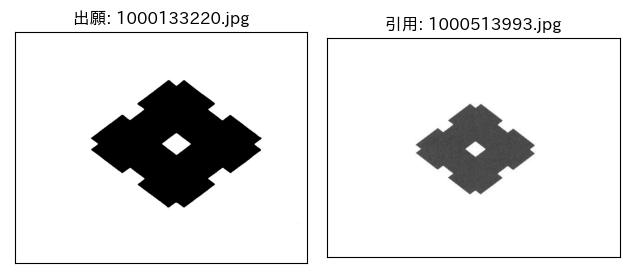

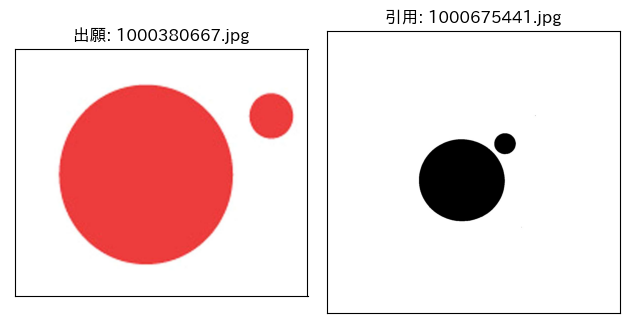

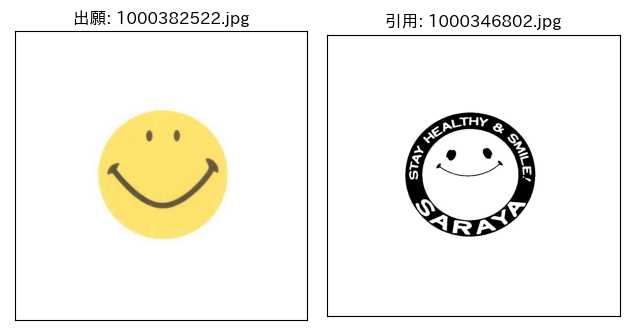

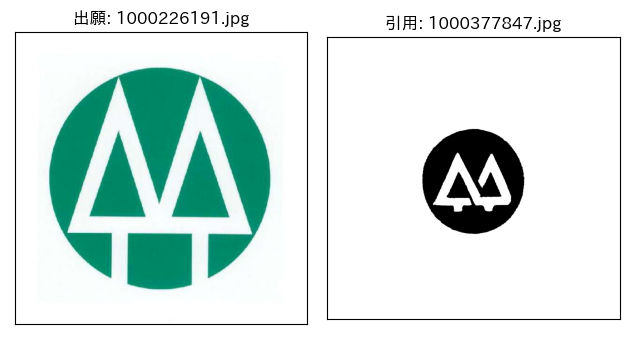

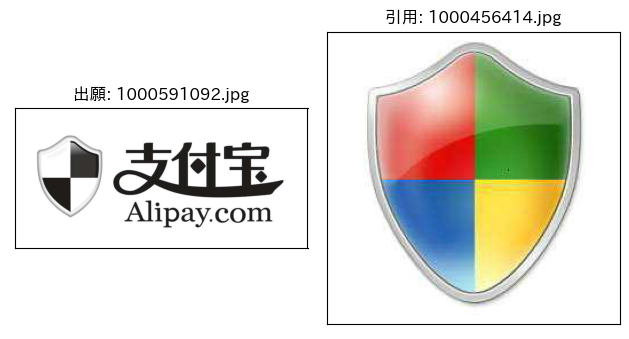

In [9]:
for i in range(5):
    idx = train_df[train_df['category'] == 4].index[i]
    show_img_pair(train_df.iloc[idx,1], train_df.iloc[idx,3])

5:向きの相違

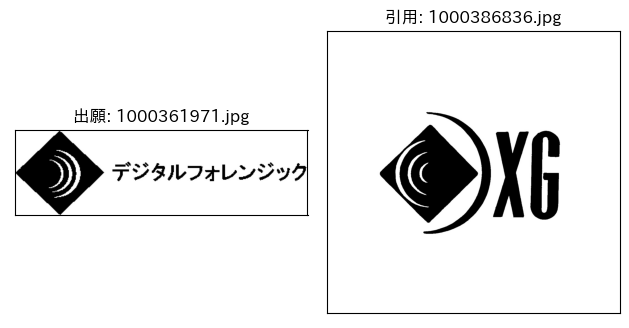

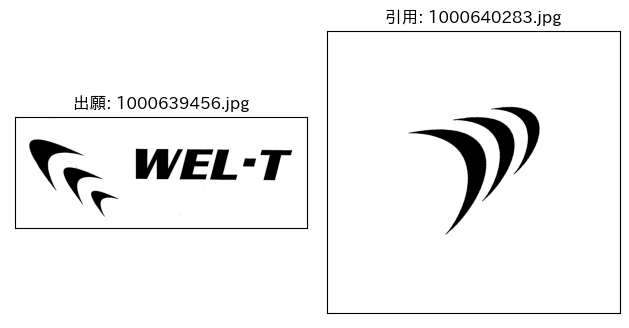

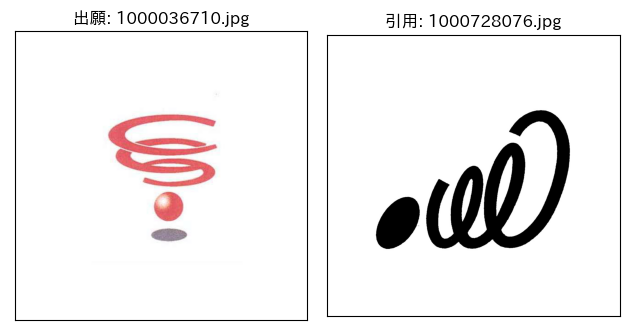

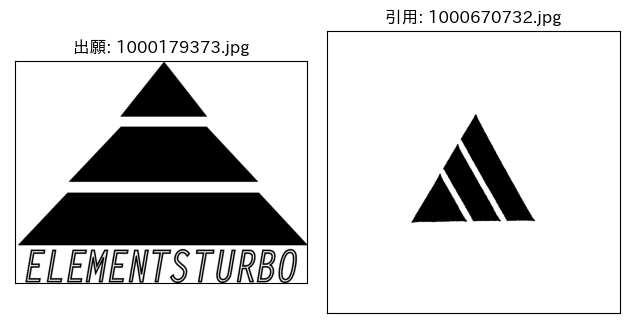

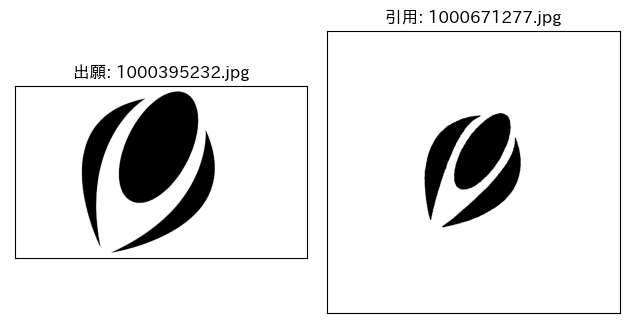

In [10]:
for i in range(5):
    idx = train_df[train_df['category'] == 5].index[i]
    show_img_pair(train_df.iloc[idx,1], train_df.iloc[idx,3])

- 酷似の場合でも余白に差がある場合が多く、そのままの画像では類似と判定できない可能性あり
- 画像中に占める文字の面積が広い場合が多く、そのままの画像では文字の存在に引っ張られた検索結果となる可能性あり